In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

#download data
(x_train_image, y_train_actual), (x_test_image, y_test_actual) = cifar10.load_data()

#preprocess
xTrain = x_train_image.astype('float32')/255.0 #reshape array形狀，從一排變成 60k row x 784 col
xTest = x_test_image.astype('float32')/255.0
#答案變成binary顯示
y_Train_OneHot = np_utils.to_categorical(y_train_actual) 
y_Test_OneHot = np_utils.to_categorical(y_test_actual)

labelDict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

# print ('train資料:', x_train_image.shape) #train資料有50k，32x32
# print ('train答案:', y_train_actual.shape) #train資料有50k答案
# print ('test資料:', x_test_image.shape) #test資料有10k，32x32
# print ('test答案:', y_test_actual.shape)#test資料有10k答案

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


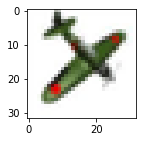

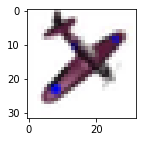

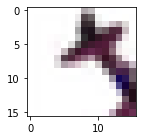

In [2]:
def show(x_img,i):
  plt.figure(figsize=(2,2))
  plt.imshow(x_img[i])
  plt.show()

def showNew(x_img,i):
  plt.figure(figsize=(2,2))
  imgNew=x_img[i].copy()
  imgNew[:,:,0]=x_img[i][:,:,1] #[xpixel, ypixel, colour channel]
  imgNew[:,:,1]=x_img[i][:,:,2]
  imgNew[:,:,2]=x_img[i][:,:,0]
  plt.imshow(imgNew)
  plt.show()

def showNewZoom(x_img,i):
  plt.figure(figsize=(2,2))
  imgNew=x_img[i].copy()
  imgNew[:,:,0]=x_img[i][:,:,1]
  imgNew[:,:,1]=x_img[i][:,:,2]
  imgNew[:,:,2]=x_img[i][:,:,0]
  plt.imshow(imgNew[0:16,0:16,:])
  plt.show()

show(x_test_image, 98)
showNew(x_test_image, 98)
showNewZoom(x_test_image, 98)

In [3]:
model = Sequential() #線性堆疊model
#1,2層：Convolution
model.add(Conv2D(filters=32, 
                 #filter數目不固定，大部分一個pixel會使用32個
                 #因為filter內數值隨機，越多filter越該準確度，
                 #下一層pooling也是用32個
                 #(3px*3px*3rgb+1bias)*32filter
                 kernel_size=(3,3), 
                 #convolution compute的特征值3x3
                input_shape=(32,32,3), #32x32彩色圖
                 padding='same',
                activation='relu')) #激發函數 ->線性，因為是絕對的輸入值
#2,3層：Pooling 2x2的移動window
model.add(MaxPooling2D(pool_size=(2,2)))

#3,4層：Convolution
model.add(Conv2D(filters=64, 
                 #64?
                 #(3*3*32+1)*64
                 kernel_size=(3,3), #convolution compute的特征值3x3
                 padding='same',
                activation='relu')) #激發函數 ->線性，因為是絕對的輸入值
#4,5層：Pooling 2x2的移動window
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #multi-D 轉成 neural network需要的1D資料
model.add(Dense(1024,activation='relu')) #neural network個數，激發函數：線性整流
model.add(Dense(10,activation='softmax')) #只有10個output，所以output neuron有10個

print(model.summary())
#1: filter是3x3的，所以一次feed 9pixel，加上colour channel就9*3rgb=27neuron。加上bias，一次3x3用了28neuron。

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [4]:
#開始train model
model.compile(loss='categorical_crossentropy', #calculate predict和actual 的差距
              optimizer='adam', metrics=['accuracy']) #優化、評估模型的方法

train_history = model.fit(x=xTrain, #x is input
                          y=y_Train_OneHot, validation_split=0.2, #y is actual ans 其它是預設參數
                          epochs=10, batch_size=128, verbose=0)

#測試準確率
scores = model.evaluate(xTrain, y_Train_OneHot)
print('accuracy=', scores[1])

50000/50000 [==============================] - 4s 73us/step
accuracy= 0.8901200294494629


In [5]:
prediction=model.predict_classes(xTest)

def show(img,actual,prediction,index):
  print('Acutual: ',labelDict[actual[index][0]],
        'Prediction: ',labelDict[prediction[index]])
  plt.figure(figsize=(2,2))
  plt.imshow(img[index])
  plt.show()

Acutual:  airplane Prediction:  airplane


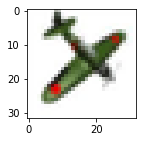

In [6]:
show(x_test_image,y_test_actual,prediction,98)

In [7]:
def plot_images_labels_prediction(images,labels,prediction,index,count): 
  fig = plt.gcf() 
  fig.set_size_inches(12, 14) 
  if count>25: count=25 
  for i in range(0, count): 
    ax = plt.subplot(5,5, 1+i) # 小圖：size5x5、第1個，第2個，。。。按順序初始化第i圖
    ax.imshow(images[index]) #第幾個圖
    title = "id=" + labelDict[labels[index][0]] #答案
    # title += ",label=" + str(labels) #答案
    title += ",predict=" + labelDict[prediction[index]] #預測 
    ax. set_title(title,fontsize=10) 
    ax.set_xticks([]) #隱藏xy label
    ax.set_yticks([])
    index+=1
  plt.show()

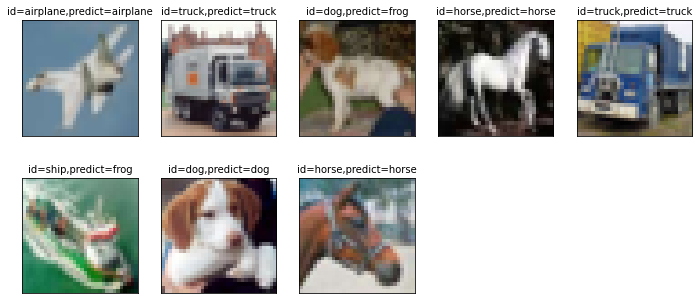

In [8]:
plot_images_labels_prediction(x_test_image,y_test_actual,prediction,10,8)

label: cat prediction: cat


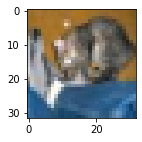

airplane 0.0001497%
automobile 0.0012199%
bird 0.0888024%
cat 98.8111734%
deer 0.0001379%
dog 0.3200619%
frog 0.7716907%
horse 0.0005625%
ship 0.0062100%
truck 0.0000006%
label: airplane prediction: bird


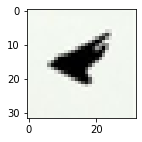

airplane 0.5314531%
automobile 0.0000001%
bird 99.4683921%
cat 0.0001506%
deer 0.0000049%
dog 0.0000000%
frog 0.0000000%
horse 0.0000000%
ship 0.0000000%
truck 0.0000000%


In [27]:
probability=model.predict(xTest)

def showPredictedProbability(images, labels, prediction, probability, index): 
  print('label:',labelDict[labels[index][0]], 'prediction:',labelDict[prediction[index]]) 
  plt.figure(figsize=(2,2)) 
  plt.imshow(x_test_image[index]) 
  plt.show() 
  for i in range(10): 
    print(labelDict[i],'{:1.7f}%'.format(probability[index][i]*100)) 
showPredictedProbability(x_test_image,y_test_actual,prediction,probability,0)
showPredictedProbability(x_test_image,y_test_actual,prediction,probability,21)

In [28]:
index = []
for i in range(10000): 
  if y_lbl_ts[i][0] != pred[i]:
    index.append(i) 
print(index)

NameError: ignored

In [ ]:
index2 = [] 
for idx in index: 
  temp = pred_prob[idx].copy() 
  temp[np.argmax(temp)] = np.min(temp) 
  if ( np.argmax(temp) == y_lbl_ts[idx][0]): 
    index2.append(idx) 